In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
print(json.dumps(data, indent=2))


{
  "status": {
    "timestamp": "2025-03-31T12:05:04.045Z",
    "error_code": 0,
    "error_message": null,
    "elapsed": 1,
    "credit_count": 1,
    "notice": null
  },
  "data": [
    {
      "id": 6489,
      "name": "klj3d4suxy",
      "symbol": "kaerzmzm8y",
      "slug": "mdc13p0e7v",
      "cmc_rank": 3787,
      "num_market_pairs": 1799,
      "circulating_supply": 8535,
      "total_supply": 6167,
      "max_supply": 1763,
      "infinite_supply": null,
      "last_updated": "2025-03-31T12:05:04.045Z",
      "date_added": "2025-03-31T12:05:04.045Z",
      "tags": [
        "7v160slb2ql",
        "0tavgf13cwr",
        "ukvf5sivno",
        "tpav8oeidd8",
        "l8i9fangoef",
        "7885h1u0fmd",
        "napus2cr6m",
        "ylaj5ngdfb",
        "dee2qif21tu",
        "e5dsc9grstl"
      ],
      "platform": null,
      "self_reported_circulating_supply": null,
      "self_reported_market_cap": null,
      "quote": {
        "USD": {
          "price": 0.6833844879397

In [5]:
if 'status' in data and 'error_code' in data['status'] and data['status']['error_code'] != 0:
    print(f"API Error: {data['status']['error_message']}")


In [6]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')


In [7]:
def api_runner():
    global df
    url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\David Adebisi\Desktop\My_DataAnalyst_Tutorial\DataAnalysis_tutorial_with_Alex\Python_Project\API.csv'):
        df.to_csv(r'C:\Users\David Adebisi\Desktop\My_DataAnalyst_Tutorial\DataAnalysis_tutorial_with_Alex\Python_Project\API.csv', header='column_names')
    else:
         df.to_csv(r'C:\Users\David Adebisi\Desktop\My_DataAnalyst_Tutorial\DataAnalysis_tutorial_with_Alex\Python_Project\API.csv', mode='a', header='False')
    

In [ ]:
import os
from time import time
from time import sleep


for i in range(333):
    api_runner()
    print("API Runner completed successfully")
    sleep(60) #sleep for 1 minute
exit()

In [8]:
pd.set_option('display.max_columns', None)

In [9]:

df72 = pd.read_csv(r'C:\Users\David Adebisi\Desktop\My_DataAnalyst_Tutorial\DataAnalysis_tutorial_with_Alex\Python_Project\API.csv')

In [ ]:
df72

In [10]:
df

,id,name,symbol,slug,cmc_rank,num_market_pairs,circulating_supply,total_supply,max_supply,infinite_supply,last_updated,date_added,tags,platform,self_reported_circulating_supply,self_reported_market_cap,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,timestamp
0,6489,klj3d4suxy,kaerzmzm8y,mdc13p0e7v,3787,1799,8535,6167,1763,None,2025-03-31T12:05:04.045Z,2025-03-31T12:05:04.045Z,"[7v160slb2ql, 0tavgf13cwr, ukvf5sivno, tpav8oe...",None,None,None,0.683384,3316,0.590067,0.331066,0.854668,0.275485,0.012435,501,0.046071,2025-03-31T12:05:04.045Z,2025-03-31 13:05:27.296885
1,9457,j9tnupfsedh,kcjgcxiio4i,urp5i9i1n1,9646,723,5655,7042,6671,None,2025-03-31T12:05:04.045Z,2025-03-31T12:05:04.045Z,"[8k6hpatv37e, ne35xwfylin, 6x4xi5wqkx6, wray4e...",None,None,None,0.508424,2113,0.386010,0.272981,0.626438,0.002640,0.761330,3733,0.643993,2025-03-31T12:05:04.045Z,2025-03-31 13:05:27.296885
2,9868,w7s68lxris,9aykw59g7ni,ccw5atxjyge,3271,7063,3315,509,5901,None,2025-03-31T12:05:04.045Z,2025-03-31T12:05:04.045Z,"[ga8ahpw4qtv, aoqrq6upev, mcih3yqtgsg, psx8b5x...",None,None,None,0.060961,4543,0.569941,0.212147,0.083884,0.604350,0.605269,4737,0.592482,2025-03-31T12:05:04.045Z,2025-03-31 13:05:27.296885
3,2522,5tznynp163,8om6fbjh8jm,qcxtffxwuak,9775,1995,5221,4913,5597,None,2025-03-31T12:05:04.045Z,2025-03-31T12:05:04.045Z,"[zgjvl0sqlm, vsrt25k4j3c, j99x3jn4eif, 2v9bfo7...",None,None,None,0.931142,2559,0.011882,0.695812,0.820616,0.635791,0.518133,6487,0.741599,2025-03-31T12:05:04.045Z,2025-03-31 13:05:27.296885
4,3605,qfap3sqgntg,lwhtv2kku1,6yav1juldq9,9340,7495,9241,4107,4080,None,2025-03-31T12:05:04.045Z,2025-03-31T12:05:04.045Z,"[6rj5ezaaab4, pxc729k1aup, ikpj2wpv0ie, 6b0ruu...",None,None,None,0.752839,4891,0.375243,0.441683,0.416058,0.032915,0.723680,8815,0.035936,2025-03-31T12:05:04.045Z,2025-03-31 13:05:27.296885
5,3959,k03qzg5lzw,udb765wkjol,z8zgn0bmo1m,1533,2012,6448,1747,9905,None,2025-03-31T12:05:04.045Z,2025-03-31T12:05:04.045Z,"[93lrkz64t9, edhczmkeoeh, wh1ndlmlgmj, mjg6cdt...",None,None,None,0.333844,5750,0.075954,0.525718,0.407358,0.736196,0.527129,739,0.183703,2025-03-31T12:05:04.045Z,2025-03-31 13:05:27.296885
6,4693,u5ghn5f9o1,y8oxq6otylb,y3zeqvyfvla,2992,1726,86,8891,2488,None,2025-03-31T12:05:04.045Z,2025-03-31T12:05:04.045Z,"[rgho4o2bg7i, rrirvgokqs, cp8q8ikzpqr, wsf2cd4...",None,None,None,0.621561,4868,0.016925,0.068860,0.462063,0.094479,0.031434,9792,0.631826,2025-03-31T12:05:04.045Z,2025-03-31 13:05:27.296885
7,7834,g9zx65oy5p9,b2mxagylq3o,hq5t9rs5tgd,9853,3202,4646,8216,8426,None,2025-03-31T12:05:04.045Z,2025-03-31T12:05:04.045Z,"[n32cputp77m, f2sgfj6xl8, amtzwgooacq, qdz1q2w...",None,None,None,0.137946,8640,0.925251,0.321770,0.871468,0.794020,0.358300,6078,0.490157,2025-03-31T12:05:04.045Z,2025-03-31 13:05:27.296885
8,7000,6hohei148bn,593by1wof3j,mgwi41rty7k,9028,6218,8162,8444,2196,None,2025-03-31T12:05:04.045Z,2025-03-31T12:05:04.045Z,"[w35nbu9p3k, 4es790xsxtv, zlya2juaik9, kaq2t5i...",None,None,None,0.956480,7943,0.014082,0.501827,0.837711,0.049504,0.462238,1868,0.792571,2025-03-31T12:05:04.045Z,2025-03-31 13:05:27.296885
9,2643,8iotfg43xch,n0ej2n3zoie,qy74e2ycc6h,5459,8756,6285,6376,4838,None,2025-03-31T12:05:04.045Z,2025-03-31T12:05:04.045Z,"[dpmmhuag7lm, fkwl6k4f12l, 9ftkdweuxnp, 9ppv2p...",None,None,None,0.688075,205,0.244873,0.550032,0.071729,0.423469,0.499174,9435,0.514916,2025-03-31T12:05:04.045Z,2025-03-31 13:05:27.296885


In [11]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [12]:
df

,id,name,symbol,slug,cmc_rank,num_market_pairs,circulating_supply,total_supply,max_supply,infinite_supply,last_updated,date_added,tags,platform,self_reported_circulating_supply,self_reported_market_cap,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,timestamp
0,6489,klj3d4suxy,kaerzmzm8y,mdc13p0e7v,3787,1799,8535,6167,1763,None,2025-03-31T12:05:04.045Z,2025-03-31T12:05:04.045Z,"[7v160slb2ql, 0tavgf13cwr, ukvf5sivno, tpav8oe...",None,None,None,0.68338,3316,0.59007,0.33107,0.85467,0.27549,0.01243,501,0.04607,2025-03-31T12:05:04.045Z,2025-03-31 13:05:27.296885
1,9457,j9tnupfsedh,kcjgcxiio4i,urp5i9i1n1,9646,723,5655,7042,6671,None,2025-03-31T12:05:04.045Z,2025-03-31T12:05:04.045Z,"[8k6hpatv37e, ne35xwfylin, 6x4xi5wqkx6, wray4e...",None,None,None,0.50842,2113,0.38601,0.27298,0.62644,0.00264,0.76133,3733,0.64399,2025-03-31T12:05:04.045Z,2025-03-31 13:05:27.296885
2,9868,w7s68lxris,9aykw59g7ni,ccw5atxjyge,3271,7063,3315,509,5901,None,2025-03-31T12:05:04.045Z,2025-03-31T12:05:04.045Z,"[ga8ahpw4qtv, aoqrq6upev, mcih3yqtgsg, psx8b5x...",None,None,None,0.06096,4543,0.56994,0.21215,0.08388,0.60435,0.60527,4737,0.59248,2025-03-31T12:05:04.045Z,2025-03-31 13:05:27.296885
3,2522,5tznynp163,8om6fbjh8jm,qcxtffxwuak,9775,1995,5221,4913,5597,None,2025-03-31T12:05:04.045Z,2025-03-31T12:05:04.045Z,"[zgjvl0sqlm, vsrt25k4j3c, j99x3jn4eif, 2v9bfo7...",None,None,None,0.93114,2559,0.01188,0.69581,0.82062,0.63579,0.51813,6487,0.74160,2025-03-31T12:05:04.045Z,2025-03-31 13:05:27.296885
4,3605,qfap3sqgntg,lwhtv2kku1,6yav1juldq9,9340,7495,9241,4107,4080,None,2025-03-31T12:05:04.045Z,2025-03-31T12:05:04.045Z,"[6rj5ezaaab4, pxc729k1aup, ikpj2wpv0ie, 6b0ruu...",None,None,None,0.75284,4891,0.37524,0.44168,0.41606,0.03291,0.72368,8815,0.03594,2025-03-31T12:05:04.045Z,2025-03-31 13:05:27.296885
5,3959,k03qzg5lzw,udb765wkjol,z8zgn0bmo1m,1533,2012,6448,1747,9905,None,2025-03-31T12:05:04.045Z,2025-03-31T12:05:04.045Z,"[93lrkz64t9, edhczmkeoeh, wh1ndlmlgmj, mjg6cdt...",None,None,None,0.33384,5750,0.07595,0.52572,0.40736,0.73620,0.52713,739,0.18370,2025-03-31T12:05:04.045Z,2025-03-31 13:05:27.296885
6,4693,u5ghn5f9o1,y8oxq6otylb,y3zeqvyfvla,2992,1726,86,8891,2488,None,2025-03-31T12:05:04.045Z,2025-03-31T12:05:04.045Z,"[rgho4o2bg7i, rrirvgokqs, cp8q8ikzpqr, wsf2cd4...",None,None,None,0.62156,4868,0.01693,0.06886,0.46206,0.09448,0.03143,9792,0.63183,2025-03-31T12:05:04.045Z,2025-03-31 13:05:27.296885
7,7834,g9zx65oy5p9,b2mxagylq3o,hq5t9rs5tgd,9853,3202,4646,8216,8426,None,2025-03-31T12:05:04.045Z,2025-03-31T12:05:04.045Z,"[n32cputp77m, f2sgfj6xl8, amtzwgooacq, qdz1q2w...",None,None,None,0.13795,8640,0.92525,0.32177,0.87147,0.79402,0.35830,6078,0.49016,2025-03-31T12:05:04.045Z,2025-03-31 13:05:27.296885
8,7000,6hohei148bn,593by1wof3j,mgwi41rty7k,9028,6218,8162,8444,2196,None,2025-03-31T12:05:04.045Z,2025-03-31T12:05:04.045Z,"[w35nbu9p3k, 4es790xsxtv, zlya2juaik9, kaq2t5i...",None,None,None,0.95648,7943,0.01408,0.50183,0.83771,0.04950,0.46224,1868,0.79257,2025-03-31T12:05:04.045Z,2025-03-31 13:05:27.296885
9,2643,8iotfg43xch,n0ej2n3zoie,qy74e2ycc6h,5459,8756,6285,6376,4838,None,2025-03-31T12:05:04.045Z,2025-03-31T12:05:04.045Z,"[dpmmhuag7lm, fkwl6k4f12l, 9ftkdweuxnp, 9ppv2p...",None,None,None,0.68808,205,0.24487,0.55003,0.07173,0.42347,0.49917,9435,0.51492,2025-03-31T12:05:04.045Z,2025-03-31 13:05:27.296885


In [13]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d']].mean()

In [14]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d
name,,,
klj3d4suxy,0.33107,0.85467,0.27549
j9tnupfsedh,0.27298,0.62644,0.00264
w7s68lxris,0.21215,0.08388,0.60435
5tznynp163,0.69581,0.82062,0.63579
qfap3sqgntg,0.44168,0.41606,0.03291
k03qzg5lzw,0.52572,0.40736,0.73620
u5ghn5f9o1,0.06886,0.46206,0.09448
g9zx65oy5p9,0.32177,0.87147,0.79402
6hohei148bn,0.50183,0.83771,0.04950


In [15]:
df4 = df3.stack()
df4

name                                     
klj3d4suxy   quote.USD.percent_change_1h    0.33107
             quote.USD.percent_change_24h   0.85467
             quote.USD.percent_change_7d    0.27549
j9tnupfsedh  quote.USD.percent_change_1h    0.27298
             quote.USD.percent_change_24h   0.62644
             quote.USD.percent_change_7d    0.00264
w7s68lxris   quote.USD.percent_change_1h    0.21215
             quote.USD.percent_change_24h   0.08388
             quote.USD.percent_change_7d    0.60435
5tznynp163   quote.USD.percent_change_1h    0.69581
             quote.USD.percent_change_24h   0.82062
             quote.USD.percent_change_7d    0.63579
qfap3sqgntg  quote.USD.percent_change_1h    0.44168
             quote.USD.percent_change_24h   0.41606
             quote.USD.percent_change_7d    0.03291
k03qzg5lzw   quote.USD.percent_change_1h    0.52572
             quote.USD.percent_change_24h   0.40736
             quote.USD.percent_change_7d    0.73620
u5ghn5f9o1   quote.USD

In [16]:
type(df3)

pandas.core.frame.DataFrame

In [17]:
type(df4)

pandas.core.series.Series

In [18]:
df5 = df4.to_frame(name='values')

In [19]:
df5

values
name                                            
klj3d4suxy  quote.USD.percent_change_1h  0.33107
            quote.USD.percent_change_24h 0.85467
            quote.USD.percent_change_7d  0.27549
j9tnupfsedh quote.USD.percent_change_1h  0.27298
            quote.USD.percent_change_24h 0.62644
            quote.USD.percent_change_7d  0.00264
w7s68lxris  quote.USD.percent_change_1h  0.21215
            quote.USD.percent_change_24h 0.08388
            quote.USD.percent_change_7d  0.60435
5tznynp163  quote.USD.percent_change_1h  0.69581
            quote.USD.percent_change_24h 0.82062
            quote.USD.percent_change_7d  0.63579
qfap3sqgntg quote.USD.percent_change_1h  0.44168
            quote.USD.percent_change_24h 0.41606
            quote.USD.percent_change_7d  0.03291
k03qzg5lzw  quote.USD.percent_change_1h  0.52572
            quote.USD.percent_change_24h 0.40736
            quote.USD.percent_change_7d  0.73620
u5ghn5f9o1  quote.USD.percent_change_1h  0.06886
            quote.USD.percent_change_24h 0.46206
            quote.USD.percent_change_7d  0.09448
g9zx65oy5p9 quote.USD.percent_change_1h  0.32177
            quote.USD.percent_change_24h 0.87147
            quote.USD.percent_change_7d  0.79402
6hohei148bn quote.USD.percent_change_1h  0.50183
            quote.USD.percent_change_24h 0.83771
            quote.USD.percent_change_7d  0.04950
8iotfg43xch quote.USD.percent_change_1h  0.55003
            quote.USD.percent_change_24h 0.07173
            quote.USD.percent_change_7d  0.42347

In [20]:
df5.count()

values    30
dtype: int64

In [21]:
index = pd.Index(range(30))

df6 = df5.reset_index()
df6

,name,level_1,values
0,klj3d4suxy,quote.USD.percent_change_1h,0.33107
1,klj3d4suxy,quote.USD.percent_change_24h,0.85467
2,klj3d4suxy,quote.USD.percent_change_7d,0.27549
3,j9tnupfsedh,quote.USD.percent_change_1h,0.27298
4,j9tnupfsedh,quote.USD.percent_change_24h,0.62644
5,j9tnupfsedh,quote.USD.percent_change_7d,0.00264
6,w7s68lxris,quote.USD.percent_change_1h,0.21215
7,w7s68lxris,quote.USD.percent_change_24h,0.08388
8,w7s68lxris,quote.USD.percent_change_7d,0.60435
9,5tznynp163,quote.USD.percent_change_1h,0.69581


In [22]:
df6 = df6.rename(columns={'level_1': 'percent_change'})

In [23]:
df6

,name,percent_change,values
0,klj3d4suxy,quote.USD.percent_change_1h,0.33107
1,klj3d4suxy,quote.USD.percent_change_24h,0.85467
2,klj3d4suxy,quote.USD.percent_change_7d,0.27549
3,j9tnupfsedh,quote.USD.percent_change_1h,0.27298
4,j9tnupfsedh,quote.USD.percent_change_24h,0.62644
5,j9tnupfsedh,quote.USD.percent_change_7d,0.00264
6,w7s68lxris,quote.USD.percent_change_1h,0.21215
7,w7s68lxris,quote.USD.percent_change_24h,0.08388
8,w7s68lxris,quote.USD.percent_change_7d,0.60435
9,5tznynp163,quote.USD.percent_change_1h,0.69581


In [ ]:
# Note these names are not in the right order. I had to name them myself because i did not like the former names
# I could not understand why they were different from the video i am learning this from but i'm guessing because the data has been too long.

crypto_mapping1 = {
    'ibthn9gxxxj': 'Bitcoin',
    '09eyg13vdtx': 'Ethereum',
    'qcj6cpjx8u': 'Tether',
    'nreyb3qcpbp': 'USD Coin',
    't6puk3u1ae': 'BNB',
    'm3kjf9ypyu': 'XRP',
    'op1n03fqrps': 'Binance USD',
    'bww73t6dra': 'Cardano',
    'p8y9uvneqfr': 'Solana',
    'pf9p9n1xdpa': 'Dogecoin'
}

df6['name'] = df6['name'].replace(crypto_mapping1)





In [24]:
# Define the mapping of old names to new names
new_names = [
    "Bitcoin", "Ethereum", "Tether", "USD Coin", "BNB",
    "XRP", "Binance USD", "Cardano", "Solana", "Dogecoin"
]

# Create a mapping from old names to new names
unique_old_names = df6["name"].unique()
name_mapping = {old: new for old, new in zip(unique_old_names, new_names)}

# Replace the names in the DataFrame
df6["name"] = df6["name"].replace(name_mapping)

# Display the updated DataFrame
print(df6)


           name                percent_change  values
0       Bitcoin   quote.USD.percent_change_1h 0.33107
1       Bitcoin  quote.USD.percent_change_24h 0.85467
2       Bitcoin   quote.USD.percent_change_7d 0.27549
3      Ethereum   quote.USD.percent_change_1h 0.27298
4      Ethereum  quote.USD.percent_change_24h 0.62644
5      Ethereum   quote.USD.percent_change_7d 0.00264
6        Tether   quote.USD.percent_change_1h 0.21215
7        Tether  quote.USD.percent_change_24h 0.08388
8        Tether   quote.USD.percent_change_7d 0.60435
9      USD Coin   quote.USD.percent_change_1h 0.69581
10     USD Coin  quote.USD.percent_change_24h 0.82062
11     USD Coin   quote.USD.percent_change_7d 0.63579
12          BNB   quote.USD.percent_change_1h 0.44168
13          BNB  quote.USD.percent_change_24h 0.41606
14          BNB   quote.USD.percent_change_7d 0.03291
15          XRP   quote.USD.percent_change_1h 0.52572
16          XRP  quote.USD.percent_change_24h 0.40736
17          XRP   quote.USD.

In [25]:
type(df6)

pandas.core.frame.DataFrame

In [26]:
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.33107
1,Bitcoin,quote.USD.percent_change_24h,0.85467
2,Bitcoin,quote.USD.percent_change_7d,0.27549
3,Ethereum,quote.USD.percent_change_1h,0.27298
4,Ethereum,quote.USD.percent_change_24h,0.62644
5,Ethereum,quote.USD.percent_change_7d,0.00264
6,Tether,quote.USD.percent_change_1h,0.21215
7,Tether,quote.USD.percent_change_24h,0.08388
8,Tether,quote.USD.percent_change_7d,0.60435
9,USD Coin,quote.USD.percent_change_1h,0.69581


In [32]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d'],['1h', '24h', '7d'])


In [33]:
df6

,name,percent_change,values
0,Bitcoin,1h,0.33107
1,Bitcoin,24h,0.85467
2,Bitcoin,7d,0.27549
3,Ethereum,1h,0.27298
4,Ethereum,24h,0.62644
5,Ethereum,7d,0.00264
6,Tether,1h,0.21215
7,Tether,24h,0.08388
8,Tether,7d,0.60435
9,USD Coin,1h,0.69581


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

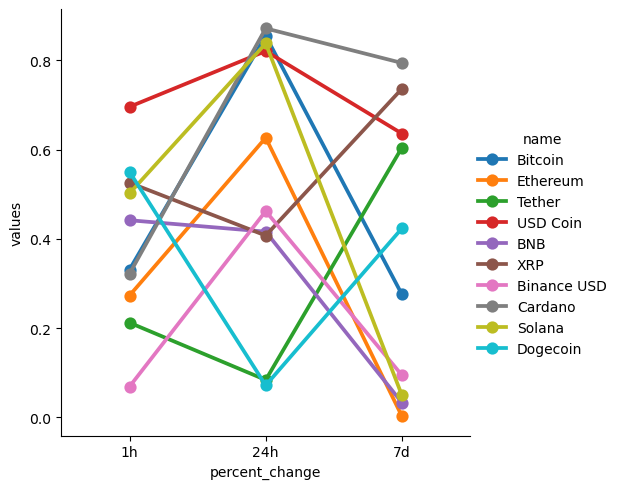

In [35]:
sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind='point')